*DISCLAMIER: Run All the first time*
<br><br>
**SEARCH FOR: ANSWERS** 
+ eigen shit
+ diagonalization
+ Differential equations and systems hereof<br>
<br>

Content:
1. Basics of matrices
2. Vector spaces
<br> - Basis
3. Linear maps
<br> - Kernel and column space
<br> - Finding a mapping matrix
<br> - Change of basis
4. Eigen
5. Diagonalization
6. Differential equations and systems

In [1]:
from sympy import *
init_printing()

**1. Basics of matrices**

defining equations and printing as a matrix -> the solution to them
+ A.row_join(b) -> [A | b]
+ Matrix.hstack(v1,v2,v3) -> v1,v2,v3 in one matrix

In [2]:
x1,x2,x3 = symbols('x1:4')
eq1 = Eq(-x2 + x3, 2)
eq2 = Eq(2*x1 + 4*x2 - 2*x3, 2)
eq3 = Eq(3*x1 + 4*x2 + x3, 9)
eq1, eq2, eq3

A,b = linear_eq_to_matrix([eq1,eq2,eq3],[x1,x2,x3])
A,b

⎛⎡0  -1  1 ⎤  ⎡2⎤⎞
⎜⎢         ⎥  ⎢ ⎥⎟
⎜⎢2  4   -2⎥, ⎢2⎥⎟
⎜⎢         ⎥  ⎢ ⎥⎟
⎝⎣3  4   1 ⎦  ⎣9⎦⎠

In [3]:
linsolve((eq1,eq2,eq3), (x1,x2,x3))

solution to [A | b]

In [4]:
A = Matrix([[1,1,1],[1,2,4],[1,3,9]])
b = Matrix([[1],[1],[1]])
linsolve((A,b))

rref 
+ last row -> the pivot columns are given as 0th, 1st, ....
+ (pivots = False) if you don not want to see them

In [5]:
A.rref()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

rank

In [6]:
A.rank()

determinant (has to be a square matrix)
+ det = 0 -> linearly dependent
+ det ≠ 0 -> linearly independent
+ det ≠ 0 -> invertable

In [7]:
A.det()

solve for c1, c2, c3 
+ {(0,0,0)} -> the vectors are linearly independent

In [8]:
cs = symbols('c:3')
linsolve((A,zeros(3,1)), cs)

Identity matrix of size n 

In [9]:
A.eye(4)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

values on diagonal -> could be and identity matrix

In [10]:
diag(1, 2, 3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

a matrix full of zeros or ones

In [11]:
zeros(2, 3)
ones(3, 1)

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

inverse 

In [12]:
A.inv()

⎡ 3    -3   1  ⎤
⎢              ⎥
⎢-5/2  4   -3/2⎥
⎢              ⎥
⎣1/2   -1  1/2 ⎦

transpose

In [13]:
A.T


⎡1  1  1⎤
⎢       ⎥
⎢1  2  3⎥
⎢       ⎥
⎣1  4  9⎦

single row operation

In [14]:
T1 = A.elementary_row_op('n<->m', 0, 1)
T2 = T1.elementary_row_op('n->kn', 0, S(1)/2)
T3 = T2.elementary_row_op('n->n+km',2,-3,0)
T1,T2,T3

⎛⎡1  2  4⎤  ⎡1/2  1  2⎤  ⎡1/2   1  2⎤⎞
⎜⎢       ⎥  ⎢         ⎥  ⎢          ⎥⎟
⎜⎢1  1  1⎥, ⎢ 1   1  1⎥, ⎢ 1    1  1⎥⎟
⎜⎢       ⎥  ⎢         ⎥  ⎢          ⎥⎟
⎝⎣1  3  9⎦  ⎣ 1   3  9⎦  ⎣-1/2  0  3⎦⎠

multiply matrix with a scalar

In [15]:
k = symbols('k')
k*A

⎡k   k    k ⎤
⎢           ⎥
⎢k  2⋅k  4⋅k⎥
⎢           ⎥
⎣k  3⋅k  9⋅k⎦

In [16]:
a = symbols('a', real = True)
B = Matrix([[1,2,3],[2,4,1],[3,a,7]])
B

⎡1  2  3⎤
⎢       ⎥
⎢2  4  1⎥
⎢       ⎥
⎣3  a  7⎦

solve it
+ B is invertable for a ∈ ℝ\ {6}

In [17]:
solveset(Eq(det(B), 0), a, S.Reals)

xs = symbols('x:7')
v1 = Matrix(xs[:3])
v2 = Matrix(xs[4:])
v1,v2

**2. Vector spaces**

In [43]:
xs = symbols('x:7')
v1 = Matrix([1+I, 3, 0 , 7*I])
v2 = Matrix([2, 4-I, 2*I, 8-I])
v3 = Matrix([3+I, 7-I, 2*I, 8+6*I])
v4 = Matrix([3,-1-I, 7*I, 0])

common dot product, cross product and norm

In [42]:
v1.dot(v2), v1.cross(v2), v1.norm()

⎛                       ⎡x₁⋅x₆ - x₂⋅x₅ ⎤     _______________________⎞
⎜                       ⎢              ⎥    ╱     2       2       2 ⎟
⎜x₀⋅x₄ + x₁⋅x₅ + x₂⋅x₆, ⎢-x₀⋅x₆ + x₂⋅x₄⎥, ╲╱  │x₀│  + │x₁│  + │x₂│  ⎟
⎜                       ⎢              ⎥                            ⎟
⎝                       ⎣x₀⋅x₅ - x₁⋅x₄ ⎦                            ⎠

span of a vector space -> largest possible linearly independent subset
+ in the example it is span(v1,v2,v3)

In [45]:
V = Matrix.hstack(v1,v2,v3,v4)
V.columnspace()

⎡⎡1 + ⅈ⎤  ⎡  2  ⎤  ⎡  3   ⎤⎤
⎢⎢     ⎥  ⎢     ⎥  ⎢      ⎥⎥
⎢⎢  3  ⎥  ⎢4 - ⅈ⎥  ⎢-1 - ⅈ⎥⎥
⎢⎢     ⎥, ⎢     ⎥, ⎢      ⎥⎥
⎢⎢  0  ⎥  ⎢ 2⋅ⅈ ⎥  ⎢ 7⋅ⅈ  ⎥⎥
⎢⎢     ⎥  ⎢     ⎥  ⎢      ⎥⎥
⎣⎣ 7⋅ⅈ ⎦  ⎣8 - ⅈ⎦  ⎣  0   ⎦⎦

**Basis**

In [47]:
A = Matrix([[1,-6],[2,0]])
B = Matrix([[1,2],[-2,0]])
C = Matrix([[-2,2],[1,0]])
D = Matrix([[3,-4],[-1,0]])
A, B, C, D

⎛⎡1  -6⎤  ⎡1   2⎤  ⎡-2  2⎤  ⎡3   -4⎤⎞
⎜⎢     ⎥, ⎢     ⎥, ⎢     ⎥, ⎢      ⎥⎟
⎝⎣2  0 ⎦  ⎣-2  0⎦  ⎣1   0⎦  ⎣-1  0 ⎦⎠

the vector representations of each matrix in the basis:
<br> 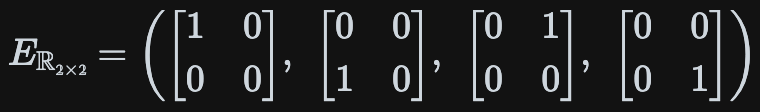
<br>and then compiled into one matrix

In [49]:
A.vec(),B.vec(),C.vec(),D.vec()
V = Matrix.hstack(A.vec(),B.vec(),C.vec(),D.vec())
V

⎡1   1   -2  3 ⎤
⎢              ⎥
⎢2   -2  1   -1⎥
⎢              ⎥
⎢-6  2   2   -4⎥
⎢              ⎥
⎣0   0   0   0 ⎦

V is spanned by A and B -> basis for the subspace (A,B) and dim = 2

In [50]:
V.columnspace()

⎡⎡1 ⎤  ⎡1 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢-2⎥⎥
⎢⎢  ⎥, ⎢  ⎥⎥
⎢⎢-6⎥  ⎢2 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣0 ⎦⎦

x1 * A + x2 * B = C
<br>
x3 * A + x2 * B = D

In [54]:
# Coefficient matrix as left-hand side
V_12 = V[:,[0,1]] # This extracts the coordinate vectors for A and B

linsolve((V_12, V.col(2))), linsolve((V_12, V.col(3)))  # Solving for C and D

**3. Linear maps**

**Kernel and column space**

In [18]:
L = Matrix([[5, 4*I, 3+5*I], [3*I, 2, -3+4*I],[3, 8, 3+7*I]])
L

⎡ 5   4⋅ⅈ  3 + 5⋅ⅈ ⎤
⎢                  ⎥
⎢3⋅ⅈ   2   -3 + 4⋅ⅈ⎥
⎢                  ⎥
⎣ 3    8   3 + 7⋅ⅈ ⎦

ker(L) -> span(ker(L))

In [19]:
L.nullspace()

⎡⎡-1 - ⅈ⎤⎤
⎢⎢      ⎥⎥
⎢⎢ -ⅈ   ⎥⎥
⎢⎢ ───  ⎥⎥
⎢⎢  2   ⎥⎥
⎢⎢      ⎥⎥
⎣⎣  1   ⎦⎦

dim(colsp(L)) = dim(rowsp(L)) = ρ(L) <- rank

In [20]:
L.columnspace(), L.rowspace()

⎛⎡⎡ 5 ⎤  ⎡4⋅ⅈ⎤⎤                                    ⎞
⎜⎢⎢   ⎥  ⎢   ⎥⎥                                    ⎟
⎜⎢⎢3⋅ⅈ⎥, ⎢ 2 ⎥⎥, [[5  4⋅ⅈ  3 + 5⋅ⅈ], [0  22  11⋅ⅈ]]⎟
⎜⎢⎢   ⎥  ⎢   ⎥⎥                                    ⎟
⎝⎣⎣ 3 ⎦  ⎣ 8 ⎦⎦                                    ⎠

𝑓(x1,x2) = (2\*x1 + x2, 3\*x1 + 2\*x2, x1 + x2, 2\*x1 + 3*x2)

In [60]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return Matrix([2*x1+x2, 3*x1+2*x2, x1+x2, 2*x1+3*x2])

𝑓(u + v) = 𝑓(u) + 𝑓(v)
<br>
𝑓(k * u) = k * 𝑓(u)

In [57]:
u1,u2,v1,v2,k = symbols('u_1,u_2,v_1,v_2,k')
u = Matrix([u1,u2])
v = Matrix([v1,v2])

u, v, k

⎛⎡u₁⎤  ⎡v₁⎤   ⎞
⎜⎢  ⎥, ⎢  ⎥, k⎟
⎝⎣u₂⎦  ⎣v₂⎦   ⎠

Linearity requirement 1 and 2
+ 0,0,... -> fulfilled

In [62]:
f(u+v) - (f(u)+f(v)), simplify(f(k*u)-k*f(u))

⎛⎡0⎤  ⎡0⎤⎞
⎜⎢ ⎥  ⎢ ⎥⎟
⎜⎢0⎥  ⎢0⎥⎟
⎜⎢ ⎥, ⎢ ⎥⎟
⎜⎢0⎥  ⎢0⎥⎟
⎜⎢ ⎥  ⎢ ⎥⎟
⎝⎣0⎦  ⎣0⎦⎠

**Finding a mapping matrix**
<br><br>
𝑓(x1,x2) = (2\*x1 + x2, 3\*x1 + 2\*x2, x1 + x2, 2\*x1 + 3*x2)

In [63]:
n = 2
m = 4
V = eye(n)
F = zeros(m,n)
for k in range(n):
    F[:,k] = f(V.col(k))
F

⎡2  1⎤
⎢    ⎥
⎢3  2⎥
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎣2  3⎦

image vector g(v) = G * v

In [64]:
G = Matrix([[1,3,1],[2,4,0],[1,1,-1],[-3,-1,5]])
v = Matrix([1,-2,5])
G*v

⎡0 ⎤
⎢  ⎥
⎢-6⎥
⎢  ⎥
⎢-6⎥
⎢  ⎥
⎣24⎦

if G * u = g(u) == 0,0,... -> u belongs to the ker(g)

In [65]:
u = Matrix([-6,3,-3])
G*u

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

ker of a map g(x) = 0
<br>ker(g) = span(the vector below)

In [66]:
G.nullspace()

⎡⎡2 ⎤⎤
⎢⎢  ⎥⎥
⎢⎢-1⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

image space
+ image(g) = g(ℝ₃) = span(indep. vectors of the initial matrix)

In [67]:
G.columnspace()

⎡⎡1 ⎤  ⎡3 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢4 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣-3⎦  ⎣-1⎦⎦

a vector belongs to image space -> g(x) = G * x = b

In [68]:
b1 = Matrix([1,2,1,-4])
linsolve((G,b1))

𝛾 = ((5,3), (-2,-1)) for map M: ℝ₂ -> ℝ₂

In [72]:
yMy = Matrix([[1,2],[3,4]])
yMy

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

**Change of basis**
<br><br>
standard basis for ℝ₂ 𝑒 = ((1,0), (0,1))

In [73]:
eIdy = Matrix([[5,-2],[3,-1]])
yIde = eIdy**-1
eMe = eIdy * yMy * yIde
eMe

⎡-5  8 ⎤
⎢      ⎥
⎣-6  10⎦

**4. Eigen**

K(λ) = ℯ[𝑓]ℯ - λ * I₃

In [22]:
eFe = Matrix([[6,3,12],[4,-5,4],[-4,-1,-10]])
lamb = symbols('\lambda')
K = eFe - lamb * eye(3)
K

⎡6 - \lambda       3             12      ⎤
⎢                                        ⎥
⎢     4       -\lambda - 5        4      ⎥
⎢                                        ⎥
⎣    -4            -1       -\lambda - 10⎦

characteristic polynomial p(λ) = det(K(λ))

In [23]:
charpoly = K.det()
charpoly

characteristic equation det(K(λ)) = 0

In [24]:
chareq = Eq(charpoly, 0)
chareq

roots of the characteristic polynomial -> eigenvalues
+ roots() -> {root:multiplicity}
+ solveset() does *NOT* mention the algebraic multiplicity

In [25]:
factor(charpoly)

In [26]:
eFe.eigenvals()

In [27]:
roots(charpoly)


In [28]:
solveset(chareq, lamb)

eigenvectors belonging to the eigenvalue
+ [(λ1 , am(λ1), eigenvector for λ1), (λ2 , am(λ2), eigenvector for λ2), ...]

In [29]:
eFe.eigenvects()

⎡⎛       ⎡⎡-1/4⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡-3⎤⎤⎞⎤
⎢⎜       ⎢⎢    ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜-6, 2, ⎢⎢ 1  ⎥, ⎢0 ⎥⎥⎟, ⎜3, 1, ⎢⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢    ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 0  ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

In [30]:
K.subs(lamb, -6).gauss_jordan_solve(zeros(3,1))

⎛⎡  τ₀     ⎤      ⎞
⎜⎢- ── - τ₁⎥      ⎟
⎜⎢  4      ⎥  ⎡τ₀⎤⎟
⎜⎢         ⎥, ⎢  ⎥⎟
⎜⎢   τ₀    ⎥  ⎣τ₁⎦⎟
⎜⎢         ⎥      ⎟
⎝⎣   τ₁    ⎦      ⎠

In [31]:
K.subs(lamb, 3).nullspace()

⎡⎡-3⎤⎤
⎢⎢  ⎥⎥
⎢⎢-1⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

**ANSWERS to eigen shit**

In [32]:
eigen_info = eFe.eigenvects()

for lmb, am_lmb, list_of_v in eigen_info:
    print(f'For the eigenvalue {lmb} with algebraic multiplicity {am_lmb}, the eigenspace is spanned by the eigenvectors')
    display(list_of_v)
    print(f'and the geometric multiplicity is {len(list_of_v)}' + '\n\n')

print(f'Linearly independent eigenvectors associated with the eigenvalue -6')
display(eigen_info[0][2])

For the eigenvalue -6 with algebraic multiplicity 2, the eigenspace is spanned by the eigenvectors


⎡⎡-1/4⎤  ⎡-1⎤⎤
⎢⎢    ⎥  ⎢  ⎥⎥
⎢⎢ 1  ⎥, ⎢0 ⎥⎥
⎢⎢    ⎥  ⎢  ⎥⎥
⎣⎣ 0  ⎦  ⎣1 ⎦⎦

and the geometric multiplicity is 2


For the eigenvalue 3 with algebraic multiplicity 1, the eigenspace is spanned by the eigenvectors


⎡⎡-3⎤⎤
⎢⎢  ⎥⎥
⎢⎢-1⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

and the geometric multiplicity is 1


Linearly independent eigenvectors associated with the eigenvalue -6


⎡⎡-1/4⎤  ⎡-1⎤⎤
⎢⎢    ⎥  ⎢  ⎥⎥
⎢⎢ 1  ⎥, ⎢0 ⎥⎥
⎢⎢    ⎥  ⎢  ⎥⎥
⎣⎣ 0  ⎦  ⎣1 ⎦⎦

**5. Diagonalization**
<br><br>
**ANSWERS to Diagonalization**

In [33]:
C = Matrix([[0,1,0],[-2,3,0],[0,0,2]])
C

⎡0   1  0⎤
⎢        ⎥
⎢-2  3  0⎥
⎢        ⎥
⎣0   0  2⎦

In [34]:
C.is_diagonalizable()

True

V - diagonalized 
Λ - Lambda
+ V⁻¹ * C * V = Λ *or* C = V * Λ * V⁻¹

In [35]:
V, Lambda = C.diagonalize()

V, C, V.inv(), Lambda

⎛⎡1  1  0⎤  ⎡0   1  0⎤  ⎡2   -1  0⎤  ⎡1  0  0⎤⎞
⎜⎢       ⎥  ⎢        ⎥  ⎢         ⎥  ⎢       ⎥⎟
⎜⎢1  2  0⎥, ⎢-2  3  0⎥, ⎢-1  1   0⎥, ⎢0  2  0⎥⎟
⎜⎢       ⎥  ⎢        ⎥  ⎢         ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0   0  2⎦  ⎣0   0   1⎦  ⎣0  0  2⎦⎠

**6. Differential equations and systems**
<br><br>
**ANSWERS for Differential equations and systems hereof**

In [36]:
G = Matrix([[2,-S(1)/2],[S(1)/3, 1]])

t = symbols('t')
f1 = Function('f1')
f2 = Function('f2')

f = Matrix([f1(t), f2(t)])
f

⎡f₁(t)⎤
⎢     ⎥
⎣f₂(t)⎦

𝑓＇(t) - **A** * 𝑓(t)

In [37]:
df = diff(f,t)

ode_sys = df - G * f
ode_sys

⎡           f₂(t)   d        ⎤
⎢-2⋅f₁(t) + ───── + ──(f₁(t))⎥
⎢             2     dt       ⎥
⎢                            ⎥
⎢  f₁(t)           d         ⎥
⎢- ───── - f₂(t) + ──(f₂(t)) ⎥
⎣    3             dt        ⎦

particular solution

In [38]:
dsolve(ode_sys, ics = {f1(0):1, f2(0):0})

general solution

In [39]:
dsolve(ode_sys)